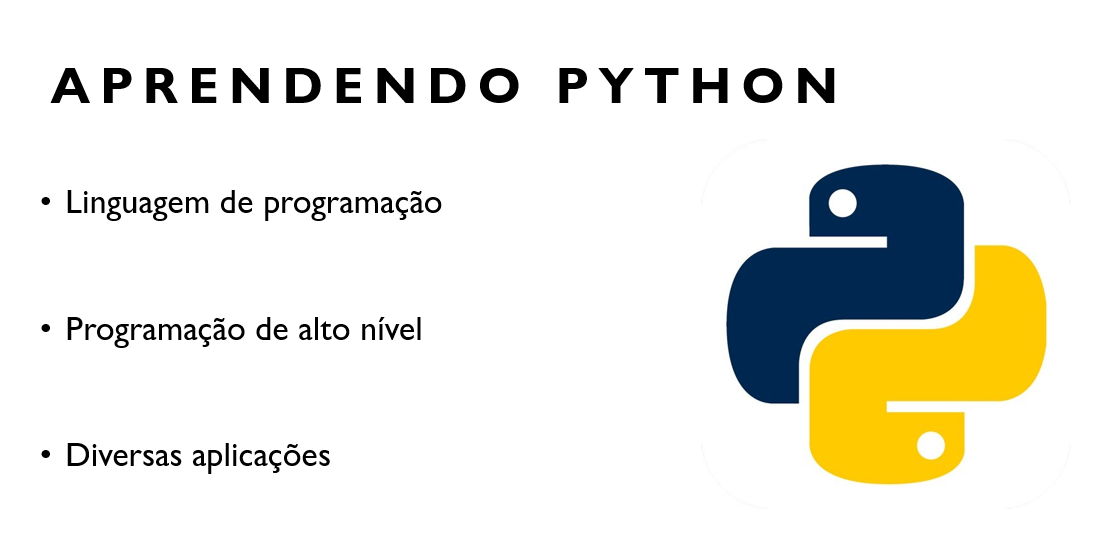

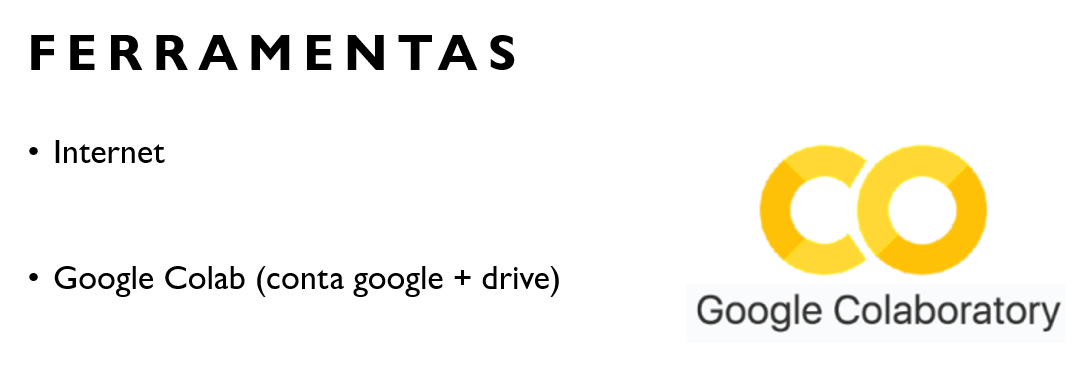

#Bibliotecas

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import math

#Dados

Lista = [ ]

In [39]:
p10 = [20.56, 19.22,18.63,17.50,16.05] # comentario lista de dados
p10

[20.56, 19.22, 18.63, 17.5, 16.05]

Loop

In [40]:
p = []
for i in p10:
  x = i/10
  p.append(round(x,3))
print(p)

[2.056, 1.922, 1.863, 1.75, 1.605]


In [41]:
p2 = []
for i in p:
  x = i*i
  p2.append(round(x,6))
print(p2)

[4.227136, 3.694084, 3.470769, 3.0625, 2.576025]


In [42]:
math.pi

3.141592653589793

In [43]:
p2quatropi2 = []
for i in p2:
  x = i/(4*(math.pi*math.pi))
  p2quatropi2.append(x)
print(p2quatropi2)

[0.10707460573428428, 0.09357224083855543, 0.08791560580728326, 0.07757403122616487, 0.06525147552306329]


Elegante

In [44]:
x1 = []
for i in p10:
  x10 = i/10
  x2 = (x10*x10)
  xpi = x2/(4*(math.pi*math.pi))
  x1.append(xpi)
print(x1)

[0.10707460573428428, 0.09357224083855542, 0.08791560580728326, 0.07757403122616487, 0.06525147552306329]


In [45]:
y2 = [1, 0.9, 0.8, 0.7, 0.6]

Tabela de dados

In [46]:
pd.DataFrame({'t^(2)/(4π^2) (s^2)':x1,'L (m)':y2 })

,t^(2)/(4π^2) (s^2),L (m)
0,0.107075,1.0
1,0.093572,0.9
2,0.087916,0.8
3,0.077574,0.7
4,0.065251,0.6


#Teoria

Equação: L = g*t^(2)/(4π^2) + ΔL

y = ax + b

y = L

a = g

x = t^(2)/(4π^2)

b = ΔL

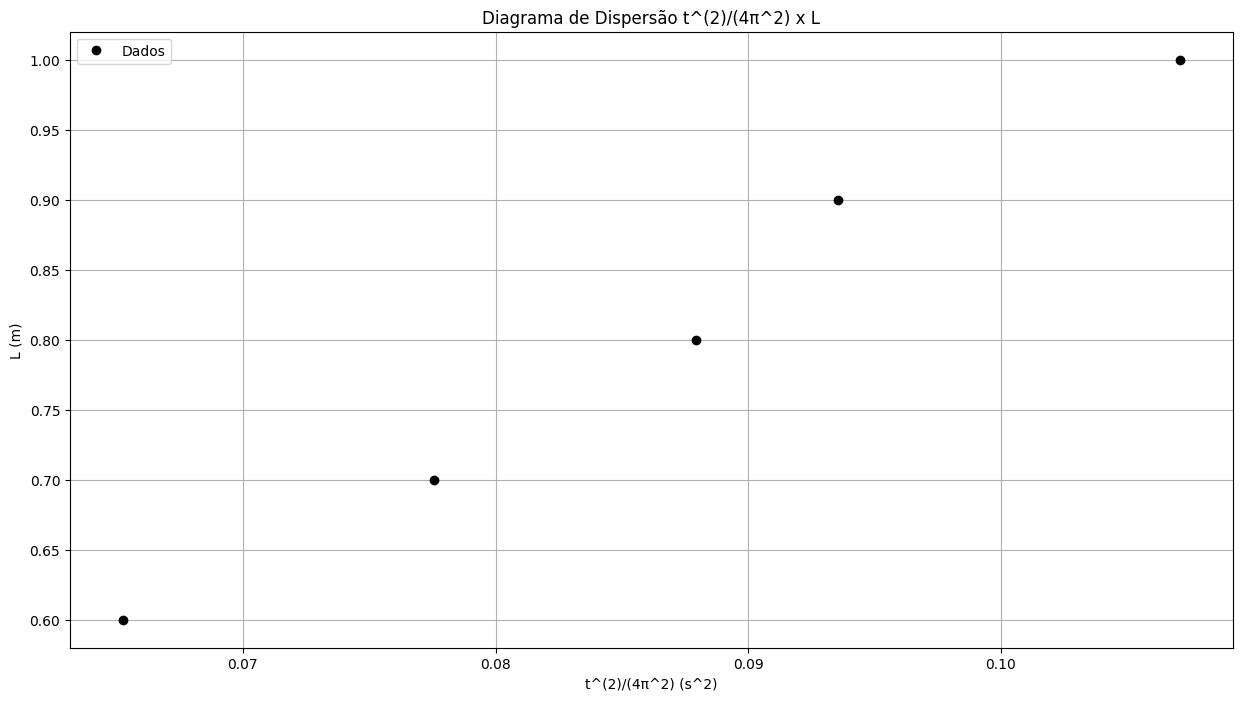

In [47]:
plt.figure(figsize=(15,8))
plt.plot(x1, y2, "o", color="black", label="Dados") # string ""
plt.title('Diagrama de Dispersão t^(2)/(4π^2) x L')
plt.xlabel("t^(2)/(4π^2) (s^2)")
plt.ylabel("L (m)")
plt.legend()
plt.grid()
# plt.savefig("logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

# Ajuste linear

Um array é uma estrutura multidimensional que nos permite armazenar dados na memória do nosso computador, de modo que cada item localizado nessa estrutura pode ser encontrado por meio de um esquema de indexação. O NumPy Python denomina essa estrutura como ndarray, como forma de abreviação a array N-dimensional.

In [48]:
x= np.array(x1)
y= np.array(y2)
print(x, type(x)) # tipo de variavel
print(y, type(y))

[0.10707461 0.09357224 0.08791561 0.07757403 0.06525148] <class 'numpy.ndarray'>
[1.  0.9 0.8 0.7 0.6] <class 'numpy.ndarray'>


Função

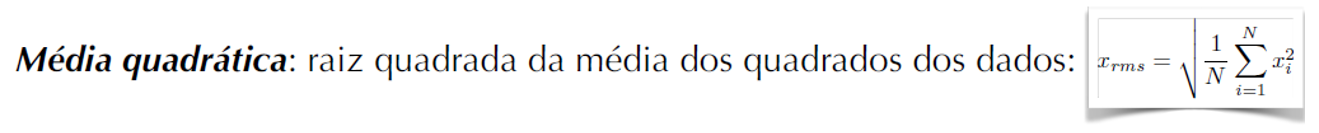

In [49]:
def media_quadratica(x):
    list_quadx = []
    for i in x:
      x2 = i*i
      list_quadx.append(x2)
    media_quadratica_res = np.sqrt(np.sum(list_quadx)/len(list_quadx))
    return media_quadratica_res

Desvio padrão


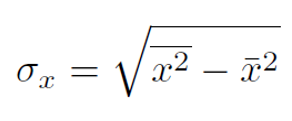

In [50]:
def desvio_padrao(lista):
 Listaquad = []
 for i in lista:
    quadrados = i**2
    Listaquad.append(quadrados)
 med_dos_quadrados = np.sum(Listaquad)/len(Listaquad)
 desv_pad2 = np.sqrt(med_dos_quadrados - np.mean(lista)**2)
 return desv_pad2

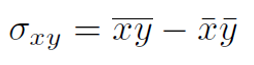

In [51]:
 def covariancia2(array1,array2):
  cov = np.mean( array1 * array2) - np.mean( array1 ) * np.mean( array2 )
  return cov

In [52]:
desvio_padrao(x)

0.01418633367308311

In [53]:
desvio_padrao(y)

0.14142135623730878

In [54]:
covariancia2(x,y)

0.001992889400696654

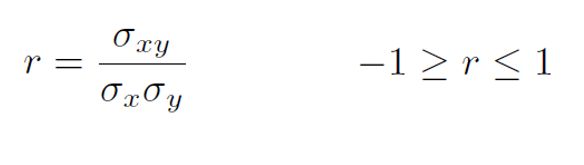

In [55]:
r = (covariancia2(x,y))/(desvio_padrao(x)*desvio_padrao(y))
r

0.9933402398825351

#Parâmetros

**y=ax+b**

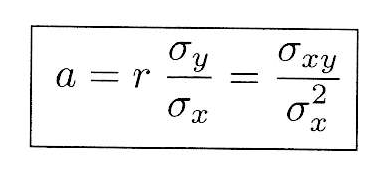

In [56]:
a= covariancia2(x,y)/((desvio_padrao(x))**2)
a

9.902454514785944

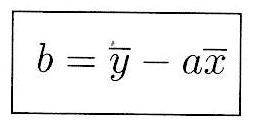

In [57]:
b = np.mean(y) - a*np.mean(x)
b

-0.05435992870094741

In [58]:
print('y = ', round(a,3), 'x +', round(b,3))

y =  9.902 x + -0.054


In [59]:
N = float(len(x)) # numero real, não inteiro
N

5.0

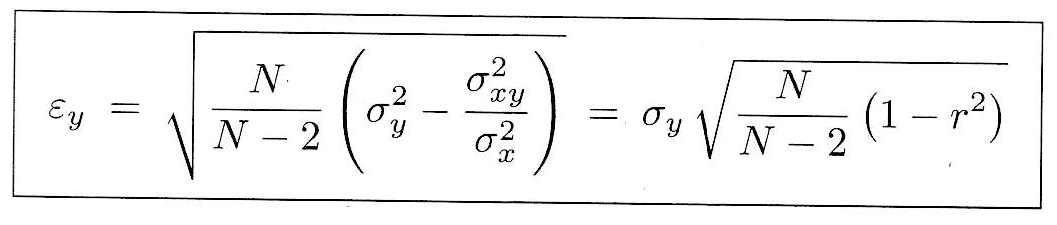

In [60]:
Ey = desvio_padrao(y)*np.sqrt(1-(r**2))*np.sqrt(N/float(N-2))
Ey

0.021035816940088634

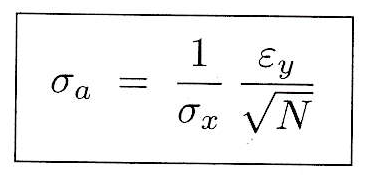

In [61]:
erro_de_a = Ey/(desvio_padrao(x)*np.sqrt(N))
erro_de_a

0.6631384503457426

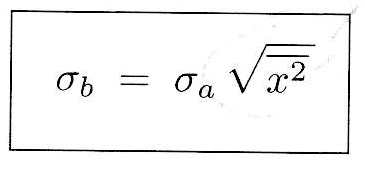

In [62]:
erro_de_b = erro_de_a*media_quadratica(x)
erro_de_b

0.05798225249041724

In [63]:
print('y = ', round(a,3), 'x +', round(b,3))

y =  9.902 x + -0.054


In [64]:
lista_y_ajuste_linear= [] # o que deveria ser em y para reta
for elemento in x:
  y_new = a*elemento + b
  lista_y_ajuste_linear.append(y_new)

lista_y_ajuste_linear

[1.0059414842714407,
 0.8722349300494434,
 0.8162203589455261,
 0.7138133870447346,
 0.5917898396888552]

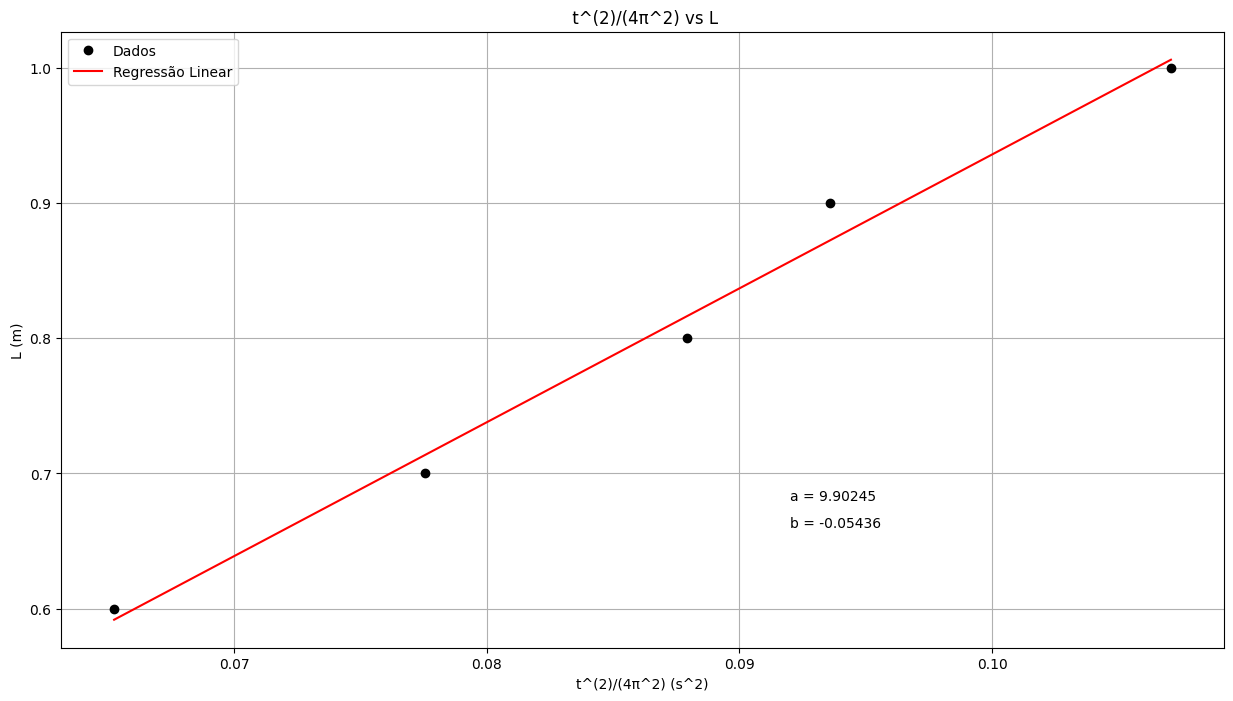

In [65]:
# Gráfico t^(2)/(4π^2) vs L com regressão linear
plt.figure(figsize=(15,8))
plt.plot(x, y, "o", color="black", label="Dados")
plt.plot([x[0],x[-1]], [lista_y_ajuste_linear[0],lista_y_ajuste_linear[-1]], "-", color="red", label="Regressão Linear")
plt.title(" t^(2)/(4π^2) vs L")
plt.xlabel("t^(2)/(4π^2) (s^2)")
plt.ylabel("L (m)")
plt.text(0.092, 0.68, "a = %.5f" % a)
plt.text(0.092, 0.66, "b = %.5f" % b)
plt.legend()
plt.grid()
# plt.savefig("logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()

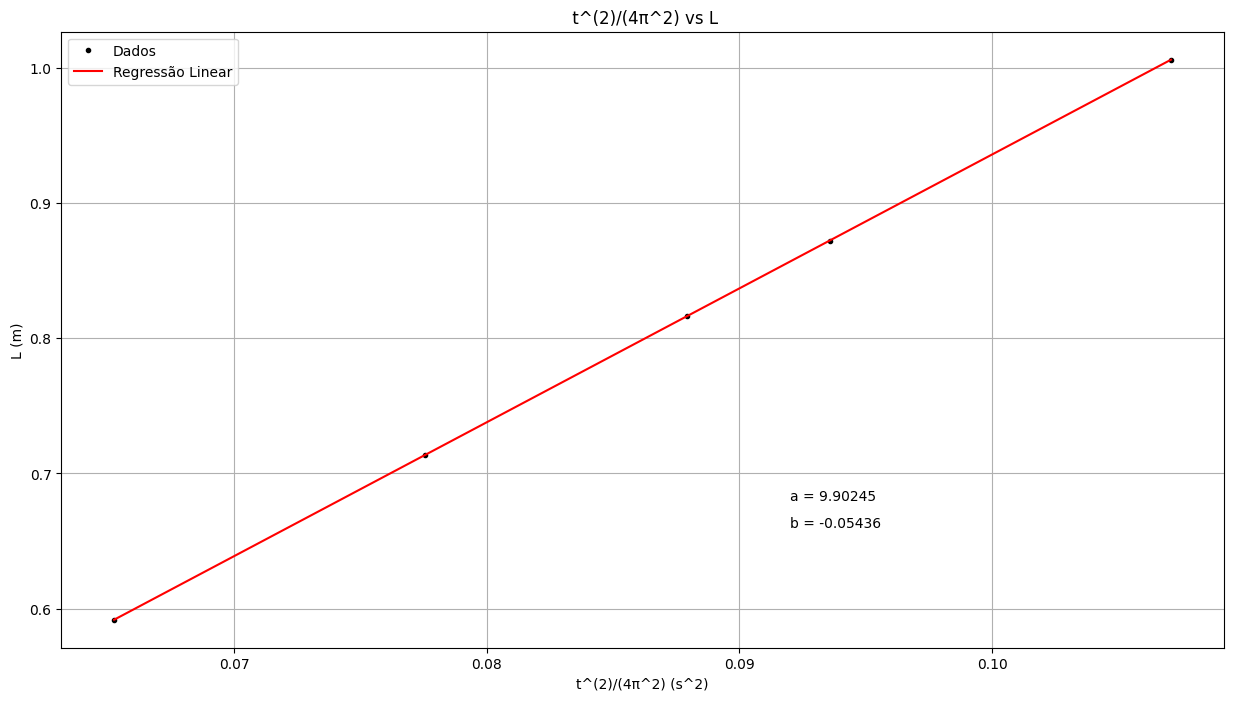

In [66]:
# Gráfico log(I) vs log(r) com pontos na reta
plt.figure(figsize=(15,8))
plt.plot(x, lista_y_ajuste_linear, ".", color="black", label="Dados")
plt.plot([x[0],x[-1]], [lista_y_ajuste_linear[0],lista_y_ajuste_linear[-1]], "-", color="red", label="Regressão Linear")
plt.title(" t^(2)/(4π^2) vs L")
plt.xlabel("t^(2)/(4π^2) (s^2)")
plt.ylabel("L (m)")
plt.text(0.092, 0.68, "a = %.5f" % a)
plt.text(0.092, 0.66, "b = %.5f" % b)
plt.legend()
plt.grid()
# plt.savefig("Pontos na reta: logaritimo da intensidade luminosa vs logaritmo da distancia.png")
plt.show()
plt.close()